In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.Size([100, 1, 28, 28]) torch.Size([100])


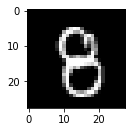

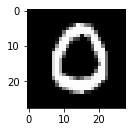

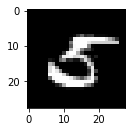

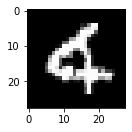

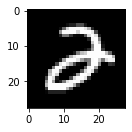

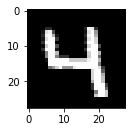

In [8]:
# hyper parameters
input_size = 784
hidden_size =  100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

train_dataset = torchvision.datasets.MNIST(root='./data', train= True,
                                          transform= transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train= False,
                                          transform= transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset,
                              batch_size=batch_size,
                              shuffle=True,
                              num_workers=0)

test_loader = DataLoader(dataset=test_dataset,
                              batch_size=batch_size,
                              shuffle=False,
                              num_workers=0)

examples = iter(train_loader)
samples, lables = next(examples)
print(samples.shape, lables.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.show()

In [16]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax needed here because cross entropy loss in pytorch itself applies
        # softmax in these functions
        return out

In [19]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, lables) in enumerate(train_loader):
        # the image datas is 100(batch size) * 1 * 28 * 28 (28 * 28 actual image)
        # that has to be reshaped for the nn 
        # we need it to be 100(batch size) * 784 (number if input to the nn)
        images = images.reshape(-1, 28*28).to(device)
        lables = lables.to(device)
        
        # forward 
        outputs = model(images)
        loss = criterion(outputs, lables)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1}, step {i+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (images, lables) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        lables = lables.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples  += lables.shape[0]
        n_correct += (predictions == lables).sum().item()
    acc = 100* n_correct / n_samples
    print(f'accuracy ={acc:.4f}')

epoch: 1, step 100, loss = 0.3657
epoch: 1, step 200, loss = 0.3729
epoch: 1, step 300, loss = 0.2662
epoch: 1, step 400, loss = 0.3359
epoch: 1, step 500, loss = 0.2795
epoch: 1, step 600, loss = 0.3960
epoch: 2, step 100, loss = 0.3147
epoch: 2, step 200, loss = 0.1528
epoch: 2, step 300, loss = 0.0986
epoch: 2, step 400, loss = 0.1355
epoch: 2, step 500, loss = 0.3764
epoch: 2, step 600, loss = 0.1128
accuracy =95.1900
